In [13]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import pdir

%matplotlib inline

In [14]:
df_swc = pd.read_csv('carpentries_leaner_count.csv')

In [15]:
df_swc

,date,year,month,learners,workshops,type,notes
0,2014,2014,NaN,52,2,swc,2 workshops
1,2015,2015,NaN,123,3,swc,3 workshops
2,16-Jan,2016,1.0,19,1,swc,NaN
3,16-Mar,2016,3.0,25,1,swc,NaN
4,16-Apr,2016,4.0,13,1,swc,NaN
5,16-Apr,2016,4.0,10,1,swc,NaN
6,16-Jun,2016,6.0,19,1,swc,NaN
7,16-Aug,2016,8.0,3,1,swc,NaN
8,16-Oct,2016,10.0,4,1,swc,NaN
9,16-Dec,2016,12.0,12,1,swc,NaN


In [16]:
df_swc.learners.sum()


425

In [17]:
df_swc = pd.read_csv('carpentries_leaner_count.csv', infer_datetime_format=True, parse_dates=['date','month'])

In [18]:
df_swc

,date,year,month,learners,workshops,type,notes
0,2014,2014,nan,52,2,swc,2 workshops
1,2015,2015,nan,123,3,swc,3 workshops
2,16-Jan,2016,1,19,1,swc,NaN
3,16-Mar,2016,3,25,1,swc,NaN
4,16-Apr,2016,4,13,1,swc,NaN
5,16-Apr,2016,4,10,1,swc,NaN
6,16-Jun,2016,6,19,1,swc,NaN
7,16-Aug,2016,8,3,1,swc,NaN
8,16-Oct,2016,10,4,1,swc,NaN
9,16-Dec,2016,12,12,1,swc,NaN


In [19]:
df_g01 = df_swc.groupby('year').sum()

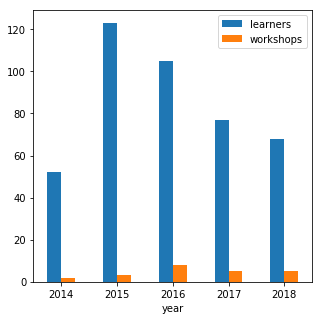

In [20]:
df_g01.plot(kind='bar', figsize=(5,5))
plt.xticks(rotation=0)

plt.show()

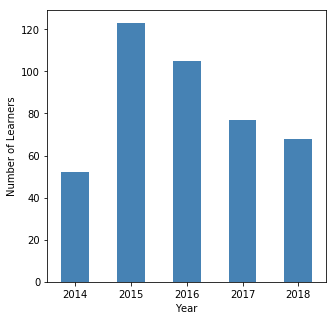

In [21]:
df_g01 = df_swc.groupby(['year']).learners.sum()


df_g01.plot(kind='bar', color='steelblue', figsize=(5,5))

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

plt.show()

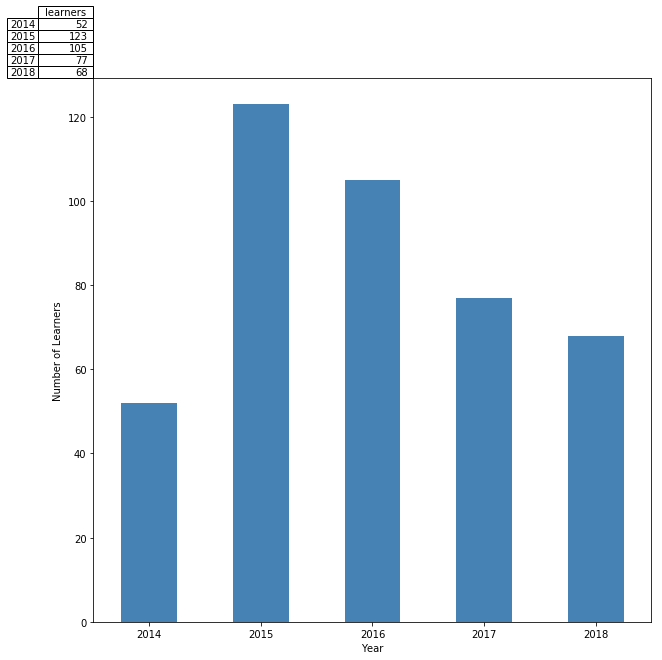

In [22]:
from pandas.plotting import table   

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', ax=axes, color='steelblue', figsize=(10,10))
table(axes, df_g01, loc='top left', colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

# fig.savefig('swc_learners_count.png', bbox_inches='tight')
plt.show()

In [23]:
frames = [df_g01, df_g02]
tallies = pd.concat(frames, axis=1)

In [24]:
tallies

,learners,workshops
year,,
2014,52,2
2015,123,3
2016,105,8
2017,77,5
2018,68,5


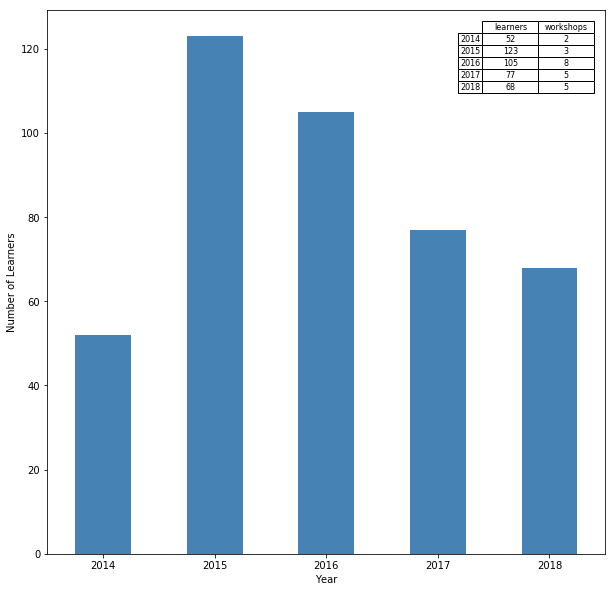

In [25]:

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', color='steelblue',ax=axes, figsize=(10,10))
table(axes, tallies, 
      loc='upper right', 
   #   rowLoc = 'center', 
      cellLoc = 'center',
      colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

fig.savefig('plots/carpentries_learner_counts_201807.png',dpi=300, bbox_inches='tight')

In [26]:
df_doamins = pd.read_csv('departments_served-clean.csv')

In [27]:
df_doamins

,department
0,Microbiology and Plant Biology
1,Biology
2,Biology
3,Microbiology and Plant Biology
4,Microbiology and Plant Biology
5,Geography and Environmental Sustainability
6,Biology
7,Microbiology and Plant Biology
8,MIS
9,History


In [28]:
df_doamins.department.unique()

array(['Microbiology and Plant Biology', 'Biology',
       'Geography and Environmental Sustainability', 'MIS', 'History',
       'French', 'Chemistry and Biochemistry', 'OU Libraries', 'OSCER',
       'Center for Spatial Analysis', 'Geology and Geophysics',
       'Geophysics', 'South Central Climate Science Center',
       'Center for Risk and Crisis Management', 'Physics', 'Meteorology',
       'CIMMS', 'OMRF', 'Oklahoma Biological Survey',
       'Library and Information Studies', 'Oklahoma Geological Survey',
       'Petroleum Engineering', 'Aerospace and Mechanical Engineering',
       'Mechanical Engineering', 'Information and Journalism',
       'Geography', 'Computer Science',
       'Civil Engineer and Environmental Science (CCES)',
       'Classics and Letters', 'Molecular Anthropology',
       'SWOSU/Computer Science',
       'Center for Research Program Development and Enrichment',
       'College of Business', 'Center for Teaching Excellence',
       'Civil Engineering', 

In [29]:
df_counts = df_doamins.groupby('department').size()

In [30]:
df_counts.sort_values(ascending=False)

department
Biology                                                   24
OU Libraries                                              21
Microbiology and Plant Biology                            19
Geography and Environmental Sustainability                18
Meteorology                                               14
Oklahoma Biological Survey                                14
Petroleum Engineering                                      5
Oklahoma Geological Survey                                 5
Computer Science                                           5
Political Science                                          4
Library and Information Studies                            4
OSCER                                                      4
Physics                                                    3
Center for Public Management                               3
USDA - ARS                                                 3
Geology and Geophysics                                     3
Geophysics   

In [56]:
len(df_counts)

62

In [50]:
dept_col_dict = {
    'Architecture': ['Division of Architecture', 'Division of Construction Science',
                               'Division of Interior Design', 'Division of Landscape Architecture',
                               'Division of Regional and City Planning'],
    'Atmospheric & Geographic Sciences': ['Geography', 'Meteorology']
}

In [51]:
dept_col_dict.keys()

dict_keys(['Architecture', 'Atmospheric & Geographic Sciences'])

In [52]:
dept_col_dict.values()

dict_values([['Division of Architecture', 'Division of Construction Science', 'Division of Interior Design', 'Division of Landscape Architecture', 'Division of Regional and City Planning'], ['Geography', 'Meteorology']])

In [55]:
for college, department in dept_col_dict.items():
    if 'Meteorology' in department:
        print(college)

Atmospheric & Geographic Sciences


In [47]:
for college, department in dept_col_dict.items():
    print(department)


['Division of Architecture', 'Division of Construction Science', 'Division of Interior Design', 'Division of Landscape Architecture', 'Division of Regional and City Planning']
['Department of Geography', 'School of Meteorology']
